## 创建一个简单的图

In [2]:
import networkx as nx
# 导入库


In [3]:
# 创建一个空图（不包含节点和边）
G=nx.Graph() # 无向图
# 添加节点
G.add_nodes_from([1,2,3,4])
# 添加边
G.add_edges_from([(1,2),(1,3),(2,3),(2,4)])

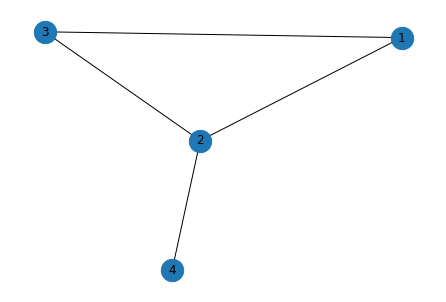

In [4]:
# 可视化
nx.draw(G,node_size=500,with_labels=True)

## 获取图的邻接矩阵


In [5]:
As = nx.adjacency_matrix(G)
print(As)

  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (3, 1)	1


In [6]:
# 转化成二维数组形式的矩阵
A= As.todense()
print(A)

[[0 1 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [0 1 0 0]]


## 已知图的邻接矩阵，创建图


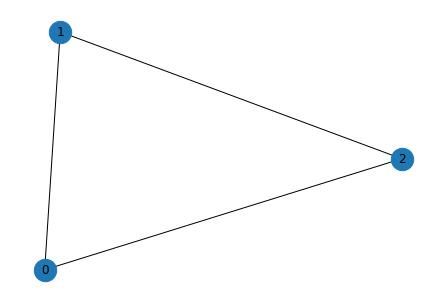

In [7]:
import numpy as np
A=np.array([[0,1,1],[1,0,1],[1,1,0]])
G=nx.from_numpy_matrix(A)
nx.draw(G,node_size=500,with_labels=True)

## 加权图

In [8]:
G= nx.Graph()
G.add_weighted_edges_from([(0,1,3.0),(1,2,7.5),(0,2,1.5)])
As = nx.adjacency_matrix(G)
print(As.todense())

[[0.  3.  1.5]
 [3.  0.  7.5]
 [1.5 7.5 0. ]]


## 有向图

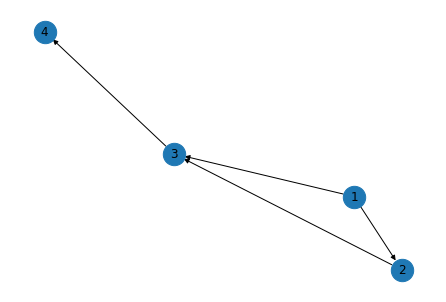

In [9]:
G = nx.DiGraph()
# 添加节点
G.add_nodes_from([1,2,3,4])
# 添加边
G.add_edges_from([(1,2),(1,3),(2,3),(3,4)])
nx.draw(G,node_size=500,with_labels=True)

## 度、平均度以及度分布

In [10]:
G = nx.Graph()
# 添加节点
G.add_nodes_from([1,2,3,4])
# 添加边
G.add_edges_from([(1,2),(2,3),(2,4),(3,4)])


In [12]:
# 获取网络G的度
d = nx.degree(G)
print(d)

[(1, 1), (2, 3), (3, 2), (4, 2)]


In [13]:
d = dict(nx.degree(G))
print(d)
print("平均度为：",sum(d.values())/len(G.nodes))

{1: 1, 2: 3, 3: 2, 4: 2}
平均度为： 2.0


In [18]:
# 获取度分布
nx.degree_histogram(G)  # 返回所有位于区间[0,dmax]的度值的频数列表

[0, 1, 2, 1]

## 绘制度分布直方图

In [19]:
import matplotlib.pyplot as plt


In [20]:
x = list(range(max(d.values())+1))
y = [i/len(G.nodes) for i in nx.degree_histogram(G)]  # 从0开始
print(x)
print(y)

[0, 1, 2, 3]
[0.0, 0.25, 0.5, 0.25]


(0.0, 4.0)

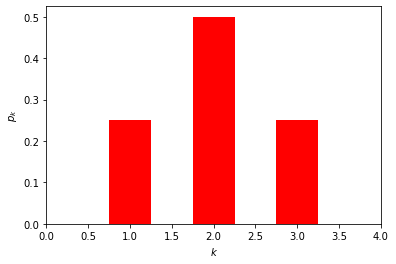

In [21]:
plt.bar(x,y,width=0.5,color="red")
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xlim([0,4])

## 路径和距离

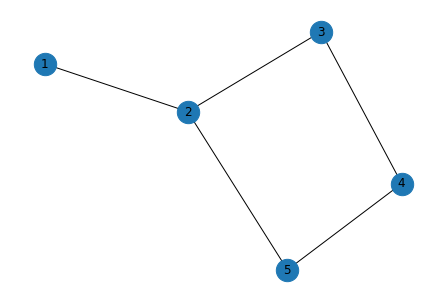

In [22]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(2,3),(2,5),(3,4),(4,5)])
nx.draw(G,node_size=500,with_labels=True)

In [23]:
nx.shortest_path(G,source=1,target=4)

[1, 2, 3, 4]

In [25]:
# 两个节点之间所有的最短路径
list(nx.all_shortest_paths(G,source=1,target=4))

[[1, 2, 3, 4], [1, 2, 5, 4]]

In [26]:
# 两个节点的最短路径长度（距离）
nx.shortest_path_length(G,source=1,target=4)

3

In [27]:
# 整个网络的平均距离
nx.average_shortest_path_length(G)

1.6

## 连通性

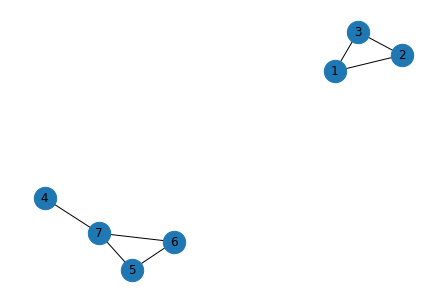

In [28]:
Ga = nx.Graph()
Ga.add_nodes_from([1,2,3,4,5,6,7])
Ga.add_edges_from([(1,2),(1,3),(2,3),(4,7),(5,6),(5,7),(6,7)])
nx.draw(Ga,node_size=500,with_labels=True)

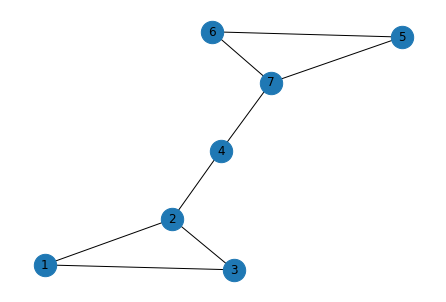

In [29]:
Gb = nx.Graph()
Gb.add_nodes_from([1,2,3,4,5,6,7])
Gb.add_edges_from([(1,2),(1,3),(2,3),(2,4),(4,7),(5,6),(5,7),(6,7)])
nx.draw(Gb,node_size=500,with_labels=True)

In [30]:
print(nx.is_connected(Ga))
print(nx.is_connected(Gb))

False
True


## 集聚系数

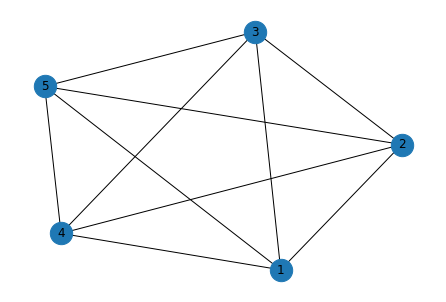

In [31]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5)])
nx.draw(G,node_size=500,with_labels=True)

In [32]:
print(nx.clustering(G,1))

1.0


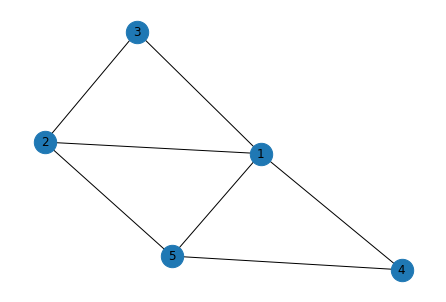

In [33]:
G.remove_edges_from([(2,4),(3,4),(3,5)])
nx.draw(G,node_size=500,with_labels=True)

In [34]:
print(nx.clustering(G,1))

0.5


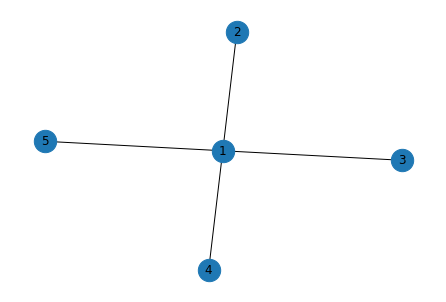

In [35]:
G.remove_edges_from([(2,3),(2,5),(4,5)])
nx.draw(G,node_size=500,with_labels=True)

In [36]:
print(nx.clustering(G,1))

0


## 平均集聚系数与全局集聚系数的区别

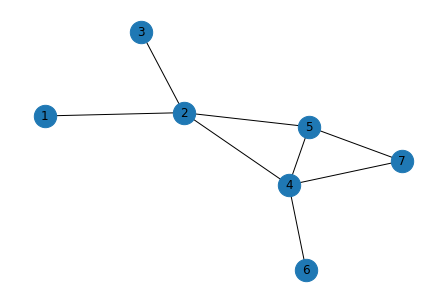

In [37]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,7)])
nx.draw(G,node_size=500,with_labels=True)

In [38]:
# 平均集聚系数
print(nx.average_clustering(G))

0.3095238095238095


In [39]:
# 全局集聚系数
print(nx.transitivity(G))

0.375
